# IDAES-PSE and Reinforcement Learning (RL): HDA Example Notebook

The purpose of this notebook is to guide the user through the flow sheet design process. For this example, we will be designing a **hydrodealkylation (HDA)** process system, in which toluene reacts with hydrogen gas at high temperatures to form benzene. 

**C<sub>6</sub>H<sub>5</sub>CH<sub>3</sub> + H<sub>2</sub> &rarr; C<sub>6</sub>H<sub>6</sub> + CH<sub>4</sub>** 

In [1]:
from RL_CORE import RL_call
import widgets 
import ipywidgets
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


## Select Units

In [2]:
w = widgets.select_units()

Use the dropdowns to select number of units. 

In [4]:
display(w)

interactive(children=(Dropdown(description='Heater', index=1, options=('0', '1', '2', '3'), style=DescriptionS…

Check that the resulting list matches your input.

In [5]:
class user_inputs:
    def __init__(self):
        self.list_unit_all = np.array([x.split(".") for x in w.result[0]], dtype=str)
        self.list_inlet_all = np.array([x.split(".") for x in w.result[1]], dtype=str)
        self.list_outlet_all = np.array([x.split(".") for x in w.result[2]], dtype=str)

In [14]:
user_inputs_obj = user_inputs()
print(user_inputs_obj.list_unit_all)
print(user_inputs_obj.list_inlet_all)
print(user_inputs_obj.list_outlet_all)

class all_available:
    def __init__(self):
        self.list_unit_all = np.array(['mixer_0', 'flash_0', 'exhaust_1', 'exhaust_2', \
            'product_0', 'mixer_1', 'mixer_2', 'heater_1', \
                'heater_2', 'StReactor_1', 'StReactor_2', 'flash_1', \
                    'splitter_1', 'splitter_2', 'compressor_1', 'compressor_2', \
                        'cooler_1', 'cooler_2', 'expander_1', 'expander_2'], dtype=str) #20
        self.list_inlet_all = np.array([x.split(".") for x in ['flash_0.inlet', 'exhaust_1.inlet', 'exhaust_2.inlet', 'product_0.inlet', \
            'mixer_1.inlet_1', 'mixer_1.inlet_2', 'mixer_2.inlet_1', 'mixer_2.inlet_2', \
                'heater_1.inlet', 'heater_2.inlet', 'StReactor_1.inlet', 'StReactor_2.inlet', \
                    'flash_1.inlet', 'splitter_1.inlet', 'splitter_2.inlet', 'compressor_1.inlet', \
                        'compressor_2.inlet', 'cooler_1.inlet', 'cooler_2.inlet', 'expander_1.inlet', \
                            'expander_2.inlet']], dtype=str) # 21
        self.list_outlet_all = np.array([x.split(".") for x in ['mixer_0.outlet', 'mixer_1.outlet', 'mixer_2.outlet', 'flash_0.vap_outlet', \
            'flash_0.liq_outlet', 'heater_1.outlet', 'heater_2.outlet', 'StReactor_1.outlet', \
                'StReactor_2.outlet', 'flash_1.liq_outlet', 'flash_1.vap_outlet', 'splitter_1.outlet_1', \
                    'splitter_1.outlet_2', 'splitter_2.outlet_1', 'splitter_2.outlet_2', 'compressor_1.outlet', \
                        'compressor_2.outlet', 'cooler_1.outlet', 'cooler_2.outlet', 'expander_1.outlet', \
                            'expander_2.outlet']], dtype=str) #21

[['heater_1']
 ['StReactor_1']
 ['mixer_0']
 ['mixer_1']
 ['flash_0']
 ['flash_1']
 ['splitter_1']
 ['compressor_1']
 ['exhaust_1']
 ['exhaust_2']
 ['product_0']]
[['heater_1' 'inlet']
 ['StReactor_1' 'inlet']
 ['mixer_1' 'inlet_1']
 ['mixer_1' 'inlet_2']
 ['flash_0' 'inlet']
 ['flash_1' 'inlet']
 ['splitter_1' 'inlet']
 ['compressor_1' 'inlet']
 ['exhaust_1' 'inlet']
 ['exhaust_2' 'inlet']
 ['product_0' 'inlet']]
[['heater_1' 'outlet']
 ['StReactor_1' 'outlet']
 ['mixer_0' 'outlet']
 ['mixer_1' 'outlet']
 ['flash_0' 'vap_outlet']
 ['flash_0' 'liq_outlet']
 ['flash_1' 'vap_outlet']
 ['flash_1' 'liq_outlet']
 ['splitter_1' 'outlet_1']
 ['splitter_1' 'outlet_2']
 ['compressor_1' 'outlet']]


## RL Options

Select desired reinforcement learning parameters

There are many parameters.Most of them have been tested and the default values are good choices. Several parameters need user's input. First, input the episodes or training steps (Default: 100,000. This is only for test. For real problem it needs 1e7 to 1e8 episodes) Next, define the starting e-greedy min and max value, or whether the model prioritizes exploration vs. highest reward. A value of 1 means the model only explores, whereas a value of 0 means the model only picks the highest reward. (Default: 0.0 and 0.9) Then, select the learning rate. Note that the model should be saved before loading a trained model. The code will output the loss function as a function of steps and some other observables when the code terminated normally.

In [18]:
r = widgets.RL_options()

### Parameter Hints <br/>
E_greedy_max:the normalized upper bound of greedy sampling. The larger value will slow the calculation.<br/>
E_greedy_min:the normalized lower bound of greedy sampling.<br/>
Memory size: the number of training data for the Deep Q Network model. Memeory size should be greater than the batch size.<br/>
Additional step: steps after E_greedy has reached maximum.<br/>
IDAES: the Institute for Design of Advanced Energy Systems. The physical solver in this code.<br/>
CNN:Intergrated convolutional neural network.<br/>
GNN:Intergrated graph neural network.<br/>
Visualization: output more results in figures.<br/>
Reward decay: It is a factor of epsilon-greedy policy used to balance exploration and exploitation.<br/>
N_hidden:determines the size of fully connected neural network.<br/>
Replace target iteration:determines how frequently to update Deep Q Network.<br/>
Complexity: determine how complicated the system design to be. Larger number denotes high complexity.<br/>

In [7]:
display(r)

interactive(children=(IntSlider(value=10000, continuous_update=False, description='Episodes:', max=100000000, …

In [8]:
P = {'model_restore':eval(r.result[0]),'model_save':eval(r.result[1]),'model_index_restore':1, 'model_index':1,
        'visualize':eval(r.result[2]), 'threshold_learn':r.result[4], 'GNN_enable':eval(r.result[14]),
        'learning_rate':r.result[13],'reward_decay':r.result[7], 'N_hidden': r.result[8],
        'replace_target_iter':r.result[9], 'memory_size':r.result[10], 'batch_size':r.result[11],
        'Episode_max_mode':'static','Episode_max':r.result[3],'Additional_step':r.result[12],
        'e_greedy_max':r.result[5],'e_greedy_min':r.result[6],'e_greedy_increment':1e-6, 'increment_degradation': [1, 2, 5, 10],
        'CNN_enable':eval(r.result[18]), 'IDAES_enable': eval(r.result[15]), 'complexity': r.result[17],
        'GNN_train':eval(r.result[16])}

## Run RL

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
==================== train RL-GNN model ====================
hard-connection: row  3  and column  3
initial observation in matrix: 
[[0.5 0.5 0.  0.  0.  0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.  0.
  0.  0.  0.  0.5 0.5]
 [0.5 0.5 0.  0.  0.5 0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.  0.
  0.  0.  0.  0.5 0.5]
 [0.5 0.5 0.  0.  0.5 0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.  0.
  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.5]
 [0.5 0.  0.  0.  0.5 0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.  0.
  0.  0.  0.  0.5 0.5]
 [0.5 0.  0.  0.  0.5 0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.  0.


Episode: 1000/20000, percent: 5.0% , Reward:  -2300.0
	epsilon=== 4.9999999999999955e-05
	Time lapse:  0.00835668638888889  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0004137182777778254  hr
	constraints consume time details:  [[0.0048439 0.0040707 0.0820388 0.0812585 0.0656666 0.0938691 0.043873
  0.0300314 0.0476694 0.1481293 0.1325046 0.0539833]]  s
	Episode ends while satisfying constraints:  [[   1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    20. 1000.]]
Episode: 1100/20000, percent: 5.5% , Reward:  -1800.0
	epsilon=== 5.499999999999994e-05
	Time lapse:  0.008645311305555556  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0004601234166667408  hr
	constraints consume time details:  [[0.0052404 0.0045658 0.0891932 0.0896298 0.0722082 0.1063118 0.0493463
  0.0338115 0.0532102 0.1632468 0.1481569 0.0603723]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+

	constraints consume time details:  [[0.0098053 0.0102654 0.1682212 0.1854513 0.1433062 0.243279  0.1080886
  0.073513  0.1153049 0.3201508 0.3042952 0.1285804]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  2.0e+00  2.5e+03]]
Episode: 2600/20000, percent: 13.0% , Reward:  -7200.0
	epsilon=== 0.00012999999999999974
	Time lapse:  0.012544929027777776  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0010094266666667827  hr
	constraints consume time details:  [[0.0101355 0.0107032 0.1742914 0.192922  0.149023  0.2535017 0.1126587
  0.0767882 0.120472  0.332593  0.3200049 0.1339689]]  s
	Episode ends while satisfying constraints:  [[1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00
  0.0e+00 0.0e+00 0.0e+00 2.0e+01 2.6e+03]]
Episode: 2700/20000, percent: 13.5% , Reward:  -1200.0
	epsilon=== 0.00013499999999999973
	Time lapse:  0.012799087861111112  hr

	Episode ends while satisfying constraints:  [[ 1.e+00  1.e+00  1.e+00  0.e+00 -1.e+00  1.e+00  1.e+00  1.e+00  1.e+00
   0.e+00  0.e+00  0.e+00  2.e+00  4.e+03]]
Episode: 4100/20000, percent: 20.5% , Reward:  -1200.0
	epsilon=== 0.00020499999999999953
	Time lapse:  0.016604846222222223  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0015732803333335472  hr
	constraints consume time details:  [[0.0150985 0.0169597 0.2603975 0.3014959 0.2293165 0.3980101 0.176098
  0.1200417 0.1888368 0.5089037 0.4926081 0.2109488]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  4.1e+03]]
Episode: 4200/20000, percent: 21.0% , Reward:  -7700.0
	epsilon=== 0.00020999999999999952
	Time lapse:  0.01685524988888889  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0016039909722224898  hr
	constraints consume time details:  [[0.0153697 0.0173048 0.2651171 0.307586  0.2334492 0.406

Episode: 5600/20000, percent: 28.0% , Reward:  -1500.0
	epsilon=== 0.0002800000000000003
	Time lapse:  0.020487301055555556  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0020933458333335783  hr
	constraints consume time details:  [[0.0197311 0.0230478 0.3405853 0.4004083 0.3029711 0.5348072 0.2357247
  0.160899  0.2555852 0.6732093 0.652049  0.28171  ]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  2.0e+00  5.6e+03]]
Episode: 5700/20000, percent: 28.5% , Reward:  -1550.0
	epsilon=== 0.0002850000000000004
	Time lapse:  0.020766409583333333  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0021342246666668924  hr
	constraints consume time details:  [[0.0200668 0.0234908 0.3466234 0.4121636 0.3084945 0.5450748 0.2414779
  0.1640919 0.2607839 0.68648   0.6634177 0.2873993]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00 -1.0e+00

	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0026176687499999732  hr
	constraints consume time details:  [[0.024318  0.0292973 0.4203776 0.5043259 0.3781004 0.6772666 0.2970731
  0.2024832 0.3195697 0.8407723 0.8087934 0.3532638]]  s
	Episode ends while satisfying constraints:  [[1.0e+00 1.0e+00 1.0e+00 0.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00
  0.0e+00 0.0e+00 0.0e+00 2.0e+01 7.1e+03]]
Episode: 7200/20000, percent: 36.0% , Reward:  -1200.0
	epsilon=== 0.00036000000000000225
	Time lapse:  0.024704903944444443  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0026528227499999857  hr
	constraints consume time details:  [[0.0246207 0.0297378 0.4255991 0.5110076 0.3828577 0.687812  0.3006796
  0.2051125 0.3236857 0.851639  0.8187657 0.3579721]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  7.2e+03]]
Episode: 7300/20000, percent: 36.5% , Reward:  -1750.0


	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  8.6e+03]]
Episode: 8700/20000, percent: 43.5% , Reward:  -6250.0
	epsilon=== 0.00043500000000000407
	Time lapse:  0.02866360327777778  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0032010648611108332  hr
	constraints consume time details:  [[0.0293834 0.0358319 0.507896  0.6138856 0.4594137 0.8364885 0.3644256
  0.2498336 0.3916236 1.0282944 0.9861223 0.4328309]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00 -1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  1.5e+01  8.7e+03]]
Episode: 8800/20000, percent: 44.0% , Reward:  -1200.0
	epsilon=== 0.0004400000000000042
	Time lapse:  0.02890872186111111  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.003229591333333097  hr
	constraints consume time details:  [[0.0296333 0.036158  0.5123582 0.61942   0.4

Episode: 10200/20000, percent: 51.0% , Reward:  -850.0
	epsilon=== 0.0005100000000000059
	Time lapse:  0.03267923363888889  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0037504733611108737  hr
	constraints consume time details:  [[0.0341773 0.0419829 0.5908779 0.7178662 0.535795  0.9787    0.4276495
  0.2939458 0.459674  1.2033462 1.1585625 0.5080456]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00  1.00e+00 -1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  1.00e+00  0.00e+00  1.00e+00  1.02e+04]]
Episode: 10300/20000, percent: 51.5% , Reward:  -1200.0
	epsilon=== 0.000515000000000006
	Time lapse:  0.03293666547222222  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0037832594722220572  hr
	constraints consume time details:  [[0.0344595 0.0423543 0.5962195 0.7241018 0.5404495 0.9879931 0.4313939
  0.2966751 0.4633325 1.2136914 1.1689527 0.5125268]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0

Episode: 11700/20000, percent: 58.5% , Reward:  -4100.0
	epsilon=== 0.0005850000000000077
	Time lapse:  0.037045805111111114  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.004343086416666407  hr
	constraints consume time details:  [[0.0395721 0.0483548 0.6811558 0.8275695 0.6219123 1.1378527 0.4964264
  0.3409376 0.537553  1.3843411 1.3415796 0.5893123]]  s
	Episode ends while satisfying constraints:  [[1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 2.00e+01 1.17e+04]]
Episode: 11800/20000, percent: 59.0% , Reward:  -1550.0
	epsilon=== 0.0005900000000000078
	Time lapse:  0.03732955849999999  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0043826826944442804  hr
	constraints consume time details:  [[0.0398983 0.0487826 0.6870536 0.8347068 0.6274011 1.1478403 0.5013251
  0.3441479 0.5429284 1.397012  1.3553294 0.5946192]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00  1.0

Episode: 13200/20000, percent: 66.0% , Reward:  -1200.0
	epsilon=== 0.0006600000000000095
	Time lapse:  0.04106927780555556  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.00489071724999975  hr
	constraints consume time details:  [[0.0443149 0.0546161 0.763557  0.9285404 0.6986845 1.2772047 0.5590413
  0.3843822 0.6076052 1.5579757 1.5107097 0.6631059]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00  1.00e+00 -1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  1.32e+04]]
Episode: 13300/20000, percent: 66.5% , Reward:  -1350.0
	epsilon=== 0.0006650000000000097
	Time lapse:  0.041321788083333325  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.004922216749999618  hr
	constraints consume time details:  [[0.0445982 0.0549711 0.7684423 0.9345486 0.7029311 1.2854088 0.5627827
  0.3868403 0.6115748 1.5682125 1.5205951 0.6672861]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0

Episode: 14700/20000, percent: 73.5% , Reward:  -1200.0
	epsilon=== 0.0007350000000000114
	Time lapse:  0.045177317361111115  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.00546659399999922  hr
	constraints consume time details:  [[0.0492743 0.0608294 0.8492997 1.034373  0.7772289 1.4235408 0.6247115
  0.4310615 0.6792357 1.7410542 1.6944672 0.7405986]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00  1.00e+00 -1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  1.47e+04]]
Episode: 14800/20000, percent: 74.0% , Reward:  -1800.0
	epsilon=== 0.0007400000000000115
	Time lapse:  0.04546898533333334  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.005510859749999193  hr
	constraints consume time details:  [[0.0496607 0.0612739 0.8563867 1.0426663 0.7832184 1.4345228 0.6297021
  0.4340062 0.6846012 1.7547105 1.708207  0.746193 ]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0

Episode: 16200/20000, percent: 81.0% , Reward:  -1200.0
	epsilon=== 0.0008100000000000132
	Time lapse:  0.049689512111111105  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.006139518666665874  hr
	constraints consume time details:  [[0.0550735 0.0681997 0.9538302 1.1606114 0.8695101 1.5999329 0.70422
  0.4848481 0.7653026 1.9631216 1.9026688 0.8330027]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00 -1.00e+00  1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  1.62e+04]]
Episode: 16300/20000, percent: 81.5% , Reward:  -1050.0
	epsilon=== 0.0008150000000000133
	Time lapse:  0.05001928122222222  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.006193441666665787  hr
	constraints consume time details:  [[0.0555571 0.0687834 0.9627682 1.1710961 0.877276  1.6145203 0.7107673
  0.4892821 0.7725641 1.9812475 1.9192157 0.8407955]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.

Episode: 17700/20000, percent: 88.5% , Reward:  -5250.0
	epsilon=== 0.000885000000000015
	Time lapse:  0.054053836777777774  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.006799433722220749  hr
	constraints consume time details:  [[0.0607409 0.0753195 1.0519319 1.2833728 0.9664397 1.7709958 0.7801211
  0.5395392 0.8544752 2.1805139 2.1069527 0.9241383]]  s
	Episode ends while satisfying constraints:  [[1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 2.00e+01 1.77e+04]]
Episode: 17800/20000, percent: 89.0% , Reward:  -1200.0
	epsilon=== 0.0008900000000000151
	Time lapse:  0.05433079236111111  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.006842787999998572  hr
	constraints consume time details:  [[0.0611302 0.0758362 1.0586041 1.2917315 0.9730396 1.7822169 0.7849426
  0.5426918 0.8594307 2.1928514 2.1209407 0.9299728]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00  1.00e

Episode: 19200/20000, percent: 96.0% , Reward:  -1200.0
	epsilon=== 0.0009600000000000168
	Time lapse:  0.058341272277777786  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.007400128916665069  hr
	constraints consume time details:  [[0.0661176 0.0820301 1.143169  1.3950453 1.0552578 1.9254403 0.8494318
  0.5874408 0.9291893 2.3726349 2.2928113 1.0041474]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00 -1.00e+00  1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  1.92e+04]]
Episode: 19300/20000, percent: 96.5% , Reward:  -5050.0
	epsilon=== 0.000965000000000017
	Time lapse:  0.05862174552777778  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.00744097949999833  hr
	constraints consume time details:  [[0.0664697 0.0824724 1.1494688 1.4029652 1.0609552 1.935689  0.8538505
  0.5905632 0.9341643 2.3848436 2.3042137 1.0093791]]  s
	Episode ends while satisfying constraints:  [[1.00e+00 1.00e+00 1.00e+00 1.00e+

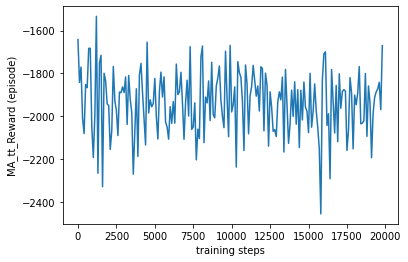

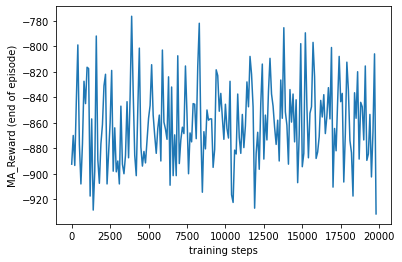

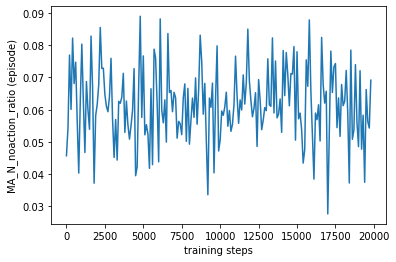

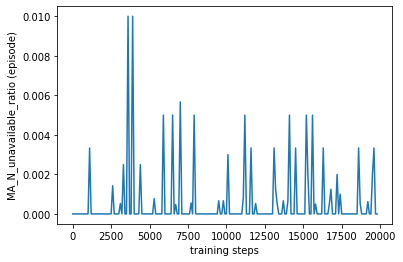

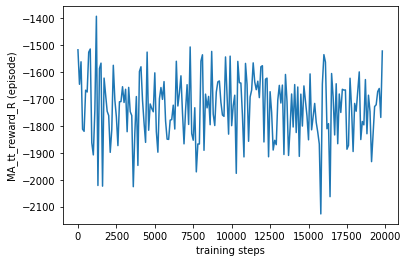

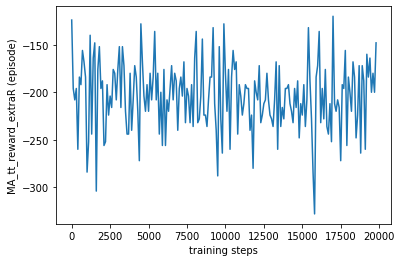

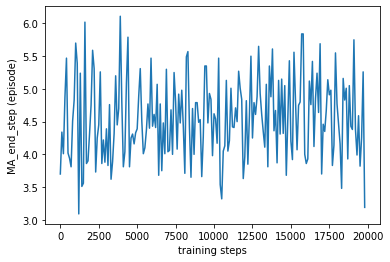

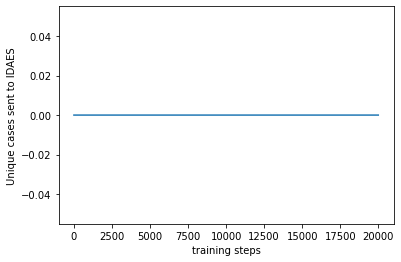

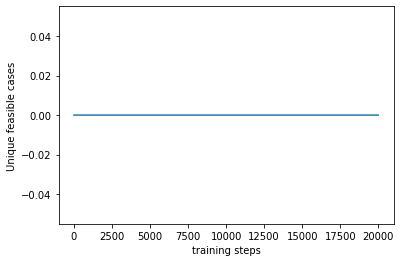

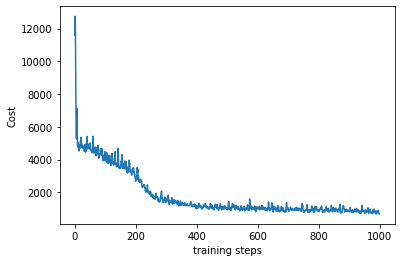

In [9]:
RL_call(user_inputs(),all_available(),P)